<a href="https://colab.research.google.com/github/Syed-Bilal-Hussaini/Task-8/blob/main/Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
data = pd.read_csv("/content/bank-full.csv", sep = ';')

print(data.head())
print(data['y'].value_counts(normalize=True))

num_features = data.select_dtypes(include=['int64', 'float64']).columns
cat_features = data.select_dtypes(include=['object']).columns

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


In [15]:
print(data.isnull().sum())

for col in cat_features:
    data[col] = data[col].str.strip().str.lower()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['y'] = le.fit_transform(data['y']) # yes -> 1, no -> 0

df_encoded = pd.get_dummies(data, drop_first=True)
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Limit depth to 3 or 4 for readability and generalization
clf = DecisionTreeClassifier(max_depth=3, random_state=42, criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

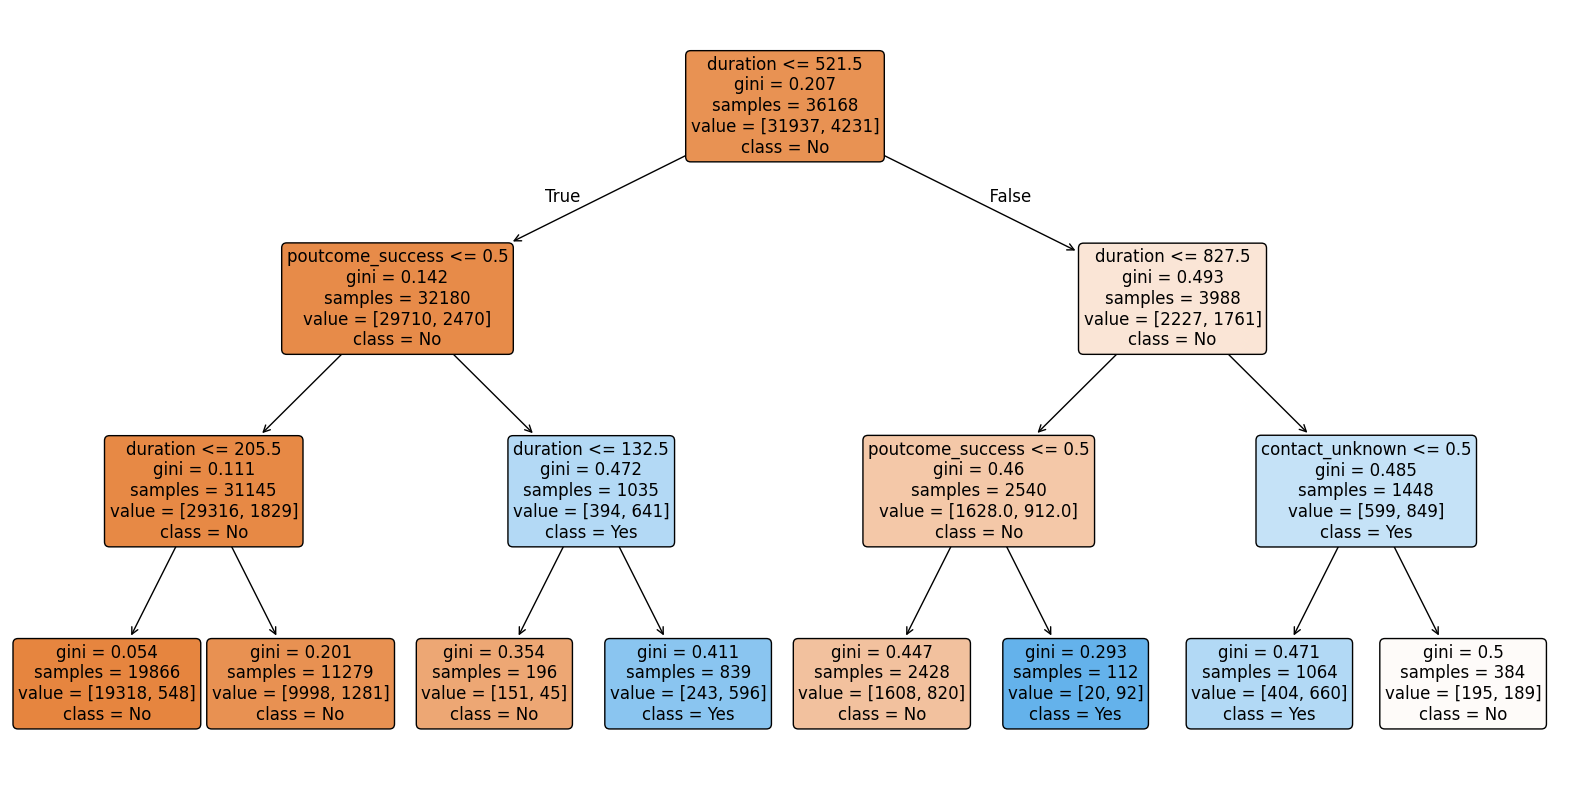

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf,
          feature_names=X.columns,
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()

In [21]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7985
           1       0.65      0.30      0.41      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



In [22]:
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9018
Testing Accuracy: 0.8995
